<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Apply_and_Concatenate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [ ]:
df_weather.tail()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113,113,113,0,1,8.7,very bad,12,30
364,2019-12-31,10,4,13,4,7,9,0.1,94,9.000,1031,32.125,10,8,1,113,143,119,0,1,8.7,very bad,12,31


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. 

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
# Your code here :
df2018 = df_main.join(df_opinion) # 365 rows × 21 columns
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-03-12,119.0,0.0,2.0,8.8,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-03-09,116.0,0.0,3.0,10.2,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-10-07,122.0,0.0,1.0,5.6,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-06-18,119.0,0.0,1.0,12.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,NaN,NaN,NaN,NaN,NaN,NaN
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,NaN,NaN,NaN,NaN,NaN,NaN
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,NaN,NaN,NaN,NaN,NaN,NaN
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,NaN,NaN,NaN,NaN,NaN,NaN


### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:** 
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [ ]:
# You should now probably drop the "date" column. 
# This column is incomplete, it were provided from the opinion file. 
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [ ]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [ ]:
# Your code here : (with .isna : True when value is missing and False otherwise)

len(df2018[df2018.isna().any(axis=1)]) #search only rows with missing values and with, we have count the rows


24

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [ ]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

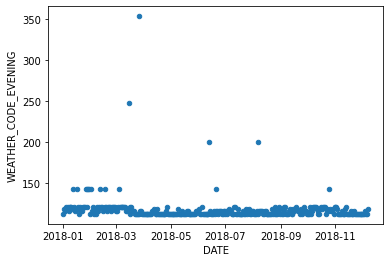

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018['DATE'] = pd.to_datetime(df2018['DATE'])

df2018.plot.scatter('DATE','WEATHER_CODE_EVENING' ) #Code to complete

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

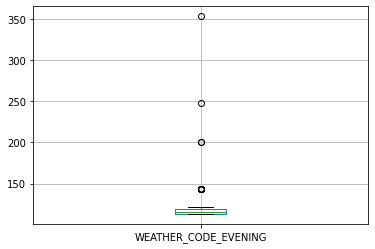

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING

df2018.boxplot('WEATHER_CODE_EVENING')

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

liste_values = []
for n in range(11) :
  values = df2018['WEATHER_CODE_EVENING'].quantile(q=n/10)
  liste_values.append(values)

liste_values #le min c'est quantile 0 et le max quantile 1 (qui est la dernière valeur)


[113.0, 113.0, 113.0, 113.0, 113.0, 116.0, 116.0, 119.0, 122.0, 122.0, 353.0]

#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method 

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [ ]:
# Hop ! Your code here :

mean_weather_column = df2018['WEATHER_CODE_EVENING'].mean()      #You have to complete this

df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column, 
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
353.000000      1
248.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [ ]:
# Your code here for TOTAL_SNOW_MM - Mean

mean_TOTAL_SNOW_MM = df2018['TOTAL_SNOW_MM'].mean()      #You have to complete this

df2018['TOTAL_SNOW_MM'].fillna(mean_TOTAL_SNOW_MM, 
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['TOTAL_SNOW_MM'].value_counts()

#les valeurs étaient à 0 et donc reste à 0 même avec la moyenne

0.0    365
Name: TOTAL_SNOW_MM, dtype: int64

In [ ]:
# Your code here for UV_INDEX - Median

median_UV_INDEX = df2018['UV_INDEX'].median()      #You have to complete this

df2018['UV_INDEX'].fillna(median_UV_INDEX, 
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['UV_INDEX'].value_counts()

#choisir la mediane était plus parlant car l'UV dépend de la zone où est placée la sonde météo (comme pour parler des salaires)

1.0    284
3.0     30
4.0     26
2.0     14
5.0     11
Name: UV_INDEX, dtype: int64

### 3.3 - Next column : 
SUNHOUR

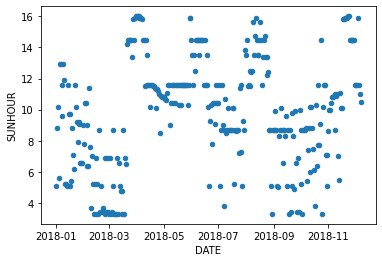

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter('DATE','SUNHOUR')


#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fill_na()` to propagate non-null values forward or backward.

In [ ]:
# Your code here

df2018['SUNHOUR'].fillna(method='ffill', inplace= True)

### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [ ]:
# Your code here
df2018['OPINION'].fillna('unknown', inplace= True)


## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

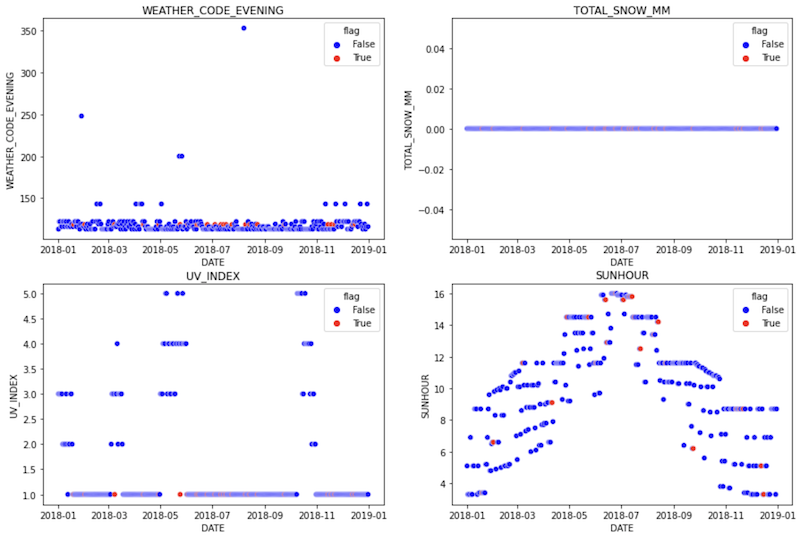

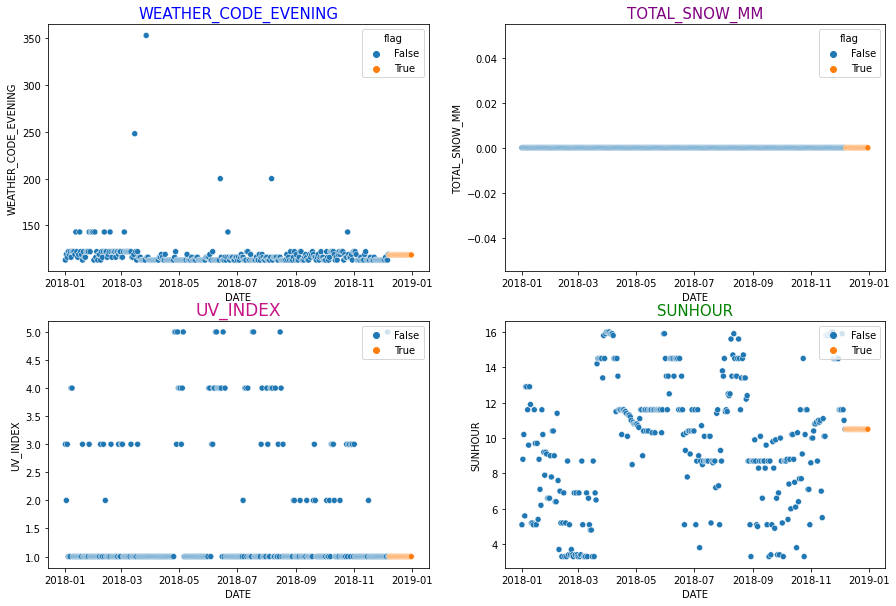

In [ ]:
#taille graph
plt.subplots(figsize=(15, 10))

#1ER GRAPH : WEATHER_CODE_EVENING
ax1 = plt.subplot(221)                       
ax1 = sns.scatterplot(x = pd.to_datetime(df2018['DATE']), y = "WEATHER_CODE_EVENING", data=df2018, hue='flag') 
ax1 = plt.title('WEATHER_CODE_EVENING', size=15, c='blue')

#2EME GRAPH : TOTAL_SNOW_MM
ax2 = plt.subplot(222)
ax2 = sns.scatterplot(x = pd.to_datetime(df2018['DATE']), y = "TOTAL_SNOW_MM", data=df2018, hue='flag' ) 
ax2 = plt.title('TOTAL_SNOW_MM', size=15, c='purple')

#3EME GRAPH : UV_INDEX
ax3 = plt.subplot(223)
ax3 = sns.scatterplot(x = pd.to_datetime(df2018['DATE']), y = "UV_INDEX", data=df2018, hue='flag' ) 
ax3 = plt.title('UV_INDEX', size=17, c='mediumvioletred')
ax3 = plt.legend(loc='upper right')

#4EME GRAPH : SUNHOUR
ax4 = plt.subplot(224)
ax4 = sns.scatterplot(x = pd.to_datetime(df2018['DATE']), y = "SUNHOUR", data=df2018, hue='flag' ) 
ax4 = plt.title('SUNHOUR', size=15, c='green')
ax4 = plt.legend(loc='upper right')

plt.show()

## Quête 2 : Missions de cette quête :
- Crée une fonction translate qui traduit chacune des 5 valeurs possibles présente dans OPINION en français.
- Applique avec apply ta fonction à la Série OPINION, puis stocke le résultat dans cette même colonne OPINION.
- Utilise apply pour créer une nouvelle colonne MONTH qui contiendra le numéro du mois (de 1 à 12). 
- Utilise apply pour créer une nouvelle colonne DAY qui contiendra le numéro du jour (de 1 à 31). 
- Concatène les lignes du DataFrame 2018, avec celles de 2019 (tu as dû l'importer tout en haut de ton notebook).
-Utilise apply pour créer une 26e colonne YEAR qui contiendra le numéro de l'année (2018 ou 2019).


***********************************

Trace les 4 graphiques suivants pour comparer 2018 et 2019 :

  - Histogramme de la vitesse du vent.
  - Boxplots pour les précipitations
  - Scatterplots pour le SUNHOUR et la date
  - Violinplots pour la température maximale

Sur chaque graphique, on pourra lire si 2018 et 2019 sont différents ou similaires, alors utilisez de la couleur pour bien les distinguer !

************************************

Après l'analyse technique, voici le moment de l'interprétation métier. D'après toi, quelle année a eu la meilleure météo ? 2018 ou 2019 ? Sur quels critères te bases-tu ?

In [ ]:
df2018.info() #mon tableau contient bien 21 colonnes et 365 lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

In [ ]:
#nom des opinions répertoriées

df2018['OPINION'].value_counts()

good                91
very bad            82
bad                 79
not good not bad    68
unknown             24
very good           21
Name: OPINION, dtype: int64

In [ ]:
#Crée une fonction translate qui traduit chacune des 5 valeurs possibles présente dans OPINION en français.

def translate(string):
  if string == 'good':
    return 'bon'
  elif string == 'very bad':
    return 'très mauvais'
  elif string == 'bad':
    return 'mauvais' 
  elif string == 'not good not bad':
    return 'ni bon ni mauvais'    
  elif string == 'unknown':
    return 'avis Inconnu'
  elif string == 'very good':
    return 'très bon'

translate('very good')

'très bon'

In [ ]:
# apply function to OPINION column !!!! ATTENTION A NE LA FAIRE QU'UNE SEULE FOIS !!!

df2018['OPINION'] = df2018['OPINION'].apply(translate)
df2018['OPINION']



0           mauvais
1           mauvais
2           mauvais
3           mauvais
4           mauvais
           ...     
360    avis Inconnu
361    avis Inconnu
362    avis Inconnu
363    avis Inconnu
364    avis Inconnu
Name: OPINION, Length: 365, dtype: object

In [ ]:
#vérification des valeurs translate dans la colonne OPINION

df2018['OPINION'].value_counts()

bon                  91
très mauvais         82
mauvais              79
ni bon ni mauvais    68
avis Inconnu         24
très bon             21
Name: OPINION, dtype: int64

In [ ]:
#ajout de la colonne 'MONTH' => Désolé mais je trouvais plus simple comme cela que de faire avec apply et créer une fonction :)

df2018['MONTH'] = pd.DatetimeIndex(df2018['DATE']).month
df2018['MONTH']

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: MONTH, Length: 365, dtype: int64

In [ ]:
df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,119.0,0.0,2.0,8.8,mauvais,False,1
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,116.0,0.0,3.0,10.2,mauvais,False,1
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,122.0,0.0,1.0,5.6,mauvais,False,1
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,119.0,0.0,1.0,12.9,mauvais,False,1


In [ ]:
#Contrôle valeurs colonne MONTH

df2018['MONTH'].value_counts()


12    31
10    31
8     31
7     31
5     31
3     31
1     31
11    30
9     30
6     30
4     30
2     28
Name: MONTH, dtype: int64

In [ ]:
#ajout de la colonne 'DAY' => Désolé mais je trouvais plus simple comme cela que de faire avec apply et créer une fonction :)

df2018['DAY'] = pd.DatetimeIndex(df2018['DATE']).day
df2018['DAY']

0       1
1       2
2       3
3       4
4       5
       ..
360    27
361    28
362    29
363    30
364    31
Name: DAY, Length: 365, dtype: int64

In [ ]:
#contrôle valeurs colonne day => ça ne devrait pas dépasser 12 (12 x chaque jour de l'année sauf le 29/02 et 30/02 qui n'y sont pas et les mois à 30 jours)

df2018['DAY'].value_counts()

16    12
15    12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
1     12
17    12
18    12
19    12
20    12
21    12
22    12
23    12
24    12
25    12
26    12
27    12
28    12
30    11
29    11
31     7
Name: DAY, dtype: int64

In [ ]:
# contrôle colonne DAY bien ajoutée ?

df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,119.0,0.0,2.0,8.8,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,116.0,0.0,3.0,10.2,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,122.0,0.0,1.0,5.6,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,119.0,0.0,1.0,12.9,mauvais,False,1,5


In [ ]:
#concaténation des df2018 et df_weather qui contient les valeurs de l'année 2019

df2018_2019 = pd.concat([df2018,df_weather])
df2018_2019.info() #j'ai bien 730 lignes et 25 colonnes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    730 non-null    object 
 1   MAX_TEMPERATURE_C       730 non-null    int64  
 2   MIN_TEMPERATURE_C       730 non-null    int64  
 3   WINDSPEED_MAX_KMH       730 non-null    int64  
 4   TEMPERATURE_MORNING_C   730 non-null    int64  
 5   TEMPERATURE_NOON_C      730 non-null    int64  
 6   TEMPERATURE_EVENING_C   730 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     730 non-null    float64
 8   HUMIDITY_MAX_PERCENT    730 non-null    int64  
 9   VISIBILITY_AVG_KM       730 non-null    float64
 10  PRESSURE_MAX_MB         730 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  730 non-null    float64
 12  HEATINDEX_MAX_C         730 non-null    int64  
 13  DEWPOINT_MAX_C          730 non-null    int64  
 14  WINDTEMP_MAX_C          730 non-null    in

In [ ]:
#ajout de la colonne 'YEAR' => Désolé mais je trouvais plus simple comme cela que de faire avec apply et créer une fonction :)

df2018_2019['YEAR'] = pd.DatetimeIndex(df2018_2019['DATE']).year
df2018_2019['YEAR']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
360    2019
361    2019
362    2019
363    2019
364    2019
Name: YEAR, Length: 730, dtype: int64

In [ ]:
#contrôle des valeurs du dataset df2018_2019 

df2018_2019['YEAR'].value_counts()

2019    365
2018    365
Name: YEAR, dtype: int64

In [ ]:
df2018_2019.reset_index(inplace=True, drop=True)

In [ ]:
#contrôle reset index, je dois avoir jusqu'à 729

df2018_2019.tail()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,YEAR
725,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,NaN,12,27,119.0,143.0,2019
726,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,NaN,12,28,143.0,116.0,2019
727,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,NaN,12,29,116.0,116.0,2019
728,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,NaN,12,30,113.0,113.0,2019
729,2019-12-31,10,4,13,4,7,9,0.1,94,9.000,1031,32.125,10,8,1,119.0,0.0,1.0,8.7,very bad,NaN,12,31,113.0,143.0,2019


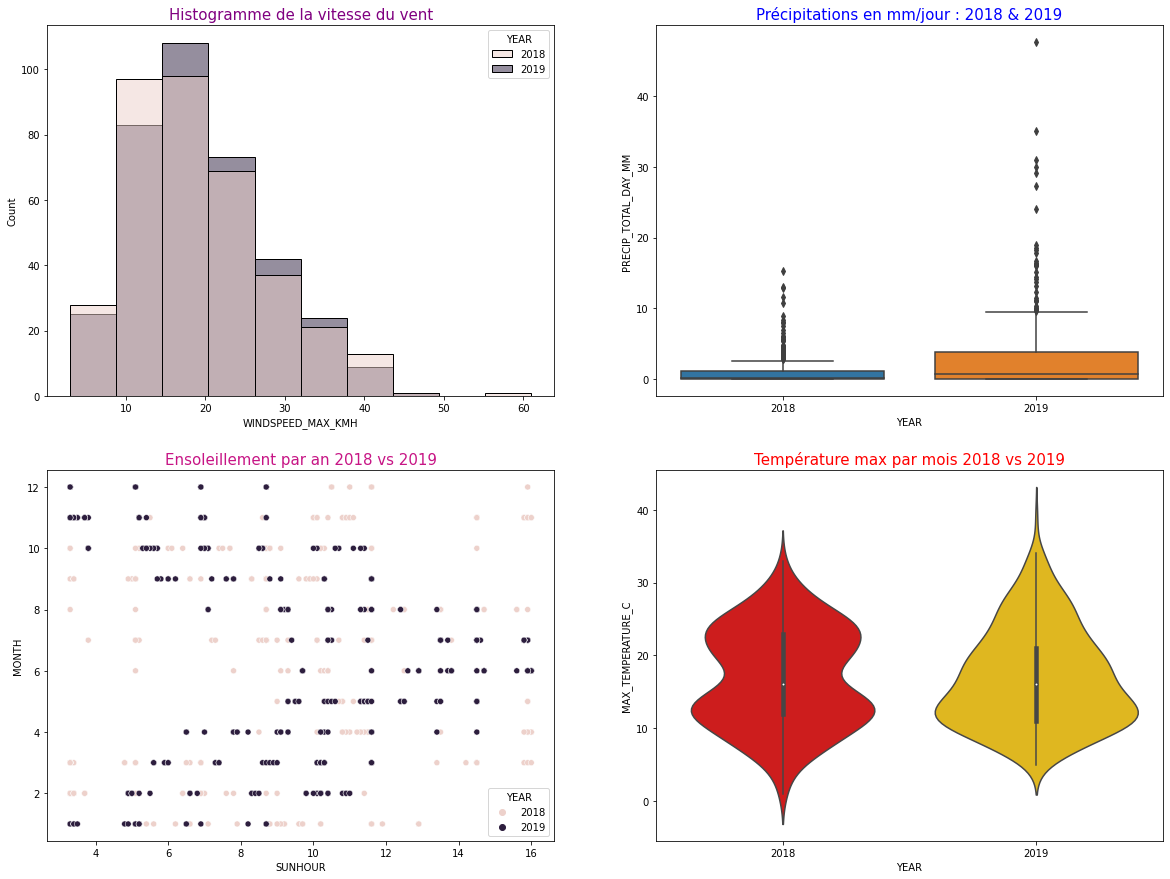

In [ ]:
#taille graph
fig, ax = plt.subplots(figsize=(20, 15))

#1ER GRAPH : Histogramme de la vitesse du vent
ax1 = plt.subplot(221)                       
ax1 = sns.histplot(x = 'WINDSPEED_MAX_KMH', hue='YEAR',  data = df2018_2019,  bins=10) 
ax1 = plt.title('Histogramme de la vitesse du vent', size=15, c='purple')


#2EME GRAPH : Boxplots pour les précipitations
ax2 = plt.subplot(222)
ax2 = sns.boxplot(x = "YEAR", y='PRECIP_TOTAL_DAY_MM', data = df2018_2019 ) 
ax2 = plt.title('Précipitations en mm/jour : 2018 & 2019', size=15, c='blue')

#3EME GRAPH : Scatterplots pour le SUNHOUR et la date
ax3 = plt.subplot(223)
ax3 = sns.scatterplot(x = 'SUNHOUR', y='MONTH', hue='YEAR', data = df2018_2019 ) 
ax3 = plt.title('Ensoleillement par an 2018 vs 2019', size=15, c='mediumvioletred')

#4EME GRAPH : Violinplots pour la température maximale
ax4 = plt.subplot(224)
ax4 = sns.violinplot(x = 'YEAR', y ='MAX_TEMPERATURE_C',  data = df2018_2019, palette='hot')
ax4 = plt.title('Température max par mois 2018 vs 2019', size=15, c='red')

plt.show()

In [ ]:
#D'après toi, quelle année a eu la meilleure météo ? 2018 ou 2019 ? Sur quels critères te bases-tu ?

#La meilleure année est 2018, moins de précipatation, moins de températures max, les temps varient normalement, moins de vent également.
#Par contre les heures d'ensoleillement sont quelques peu supérieures en 2019.